In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers,initializers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD,RMSprop,Adagrad,Adadelta,Adam,Adamax,Nadam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
from main_encoder import MainEncoder
from final_encoder import FinalEncoder
from small_decoder import SmallDecoder 
from big_decoder import BigDecoder

In [59]:
gene = pd.read_csv("final_gene.txt", sep="\t")
methyl = pd.read_csv('final_methyl.txt', sep="\t")
prot = pd.read_csv('final_prot.txt', sep="\t")

In [60]:
gene = gene.set_index('participant_id')
methyl = methyl.set_index('participant_id')
prot = prot.set_index('participant_id')

In [61]:
gene_sample = gene['sample_type']
methyl_sample = methyl['sample_type']
prot_sample = prot['sample_type']

In [62]:
gene_index = gene.index
methyl_index = methyl.index
prot_index = prot.index

In [63]:
gene_columns = gene.columns
methyl_columns = methyl.columns
prot_columns = prot.columns

In [64]:
gene.drop(columns = ['sample_type'], inplace = True)
methyl.drop(columns = ['sample_type'], inplace = True)
prot.drop(columns = ['sample_type'], inplace = True)

In [68]:
x =  methyl

if x.equals(gene):
    input_dim = 915
    latent_dim = 20
    encoder = MainEncoder(input_dim, latent_dim)
    encoded_gene = encoder.predict(x)
    
elif x.equals(methyl):
    input_dim = 1006
    latent_dim = 20
    encoder = MainEncoder(input_dim, latent_dim)
    encoded_methyl = encoder.predict(x)
elif x.equals(prot): 
    input_dim = 226
    latent_dim = 20   
    encoder = MainEncoder(input_dim, latent_dim)
    encoded_prot = encoder.predict(x)

20/20 [==============================] - 0s 2ms/step


In [69]:
concatenated_latent_space = np.concatenate((encoded_gene, encoded_prot, encoded_methyl), axis=1)

In [70]:
final_encoder = FinalEncoder(input_dim=60, latent_dim=15)
integrated_space = final_encoder.predict(concatenated_latent_space)

20/20 [==============================] - 0s 1ms/step


In [71]:
decoder_small = SmallDecoder(input_dim=15, decode_dim=60)
adam = keras.optimizers.Adam(learning_rate=0.001)
decoder_small.compile(optimizer= adam , loss='mse')

In [72]:
decoder_small.fit(integrated_space, concatenated_latent_space , epochs=1000)

Epoch 1/1000
20/20 [==============================] - 1s 2ms/step - loss: 9.4951
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 8.7976
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 8.1923
Epoch 4/1000
20/20 [==============================] - 0s 1ms/step - loss: 7.4101
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 6.4304
Epoch 6/1000
20/20 [==============================] - 0s 2ms/step - loss: 5.3638
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 4.2281
Epoch 8/1000
20/20 [==============================] - 0s 1ms/step - loss: 3.1927
Epoch 9/1000
20/20 [==============================] - 0s 1ms/step - loss: 2.3523
Epoch 10/1000
20/20 [==============================] - 0s 2ms/step - loss: 1.7118
Epoch 11/1000
20/20 [==============================] - 0s 1ms/step - loss: 1.2529
Epoch 12/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.9370
Epoch 13/1000
20/20 [====

20/20 [==============================] - 0s 1ms/step - loss: 0.0951
Epoch 102/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1037
Epoch 103/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0967
Epoch 104/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0939
Epoch 105/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1015
Epoch 106/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1149
Epoch 107/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1089
Epoch 108/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0973
Epoch 109/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0903
Epoch 110/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1083
Epoch 111/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.1007
Epoch 112/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1024
Epoch 113/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0823
Epoch 200/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1020
Epoch 201/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1004
Epoch 202/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1042
Epoch 203/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0890
Epoch 204/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0945
Epoch 205/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0818
Epoch 206/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.1071
Epoch 207/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0774
Epoch 208/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0868
Epoch 209/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0814
Epoch 210/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0805
Epoch 211/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0751
Epoch 298/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0846
Epoch 299/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0761
Epoch 300/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0917
Epoch 301/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0748
Epoch 302/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0906
Epoch 303/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0899
Epoch 304/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0760
Epoch 305/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0787
Epoch 306/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0817
Epoch 307/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0904
Epoch 308/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0815
Epoch 309/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0717
Epoch 396/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0799
Epoch 397/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0906
Epoch 398/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0656
Epoch 399/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0734
Epoch 400/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0729
Epoch 401/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0621
Epoch 402/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0787
Epoch 403/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0681
Epoch 404/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0882
Epoch 405/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0720
Epoch 406/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0812
Epoch 407/1000
20/2

20/20 [==============================] - 0s 2ms/step - loss: 0.0704
Epoch 494/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0702
Epoch 495/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0639
Epoch 496/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0793
Epoch 497/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0711
Epoch 498/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0644
Epoch 499/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0690
Epoch 500/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0807
Epoch 501/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0647
Epoch 502/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0697
Epoch 503/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0648
Epoch 504/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0778
Epoch 505/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0801
Epoch 592/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0622
Epoch 593/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0728
Epoch 594/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0648
Epoch 595/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0639
Epoch 596/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0690
Epoch 597/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0579
Epoch 598/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0605
Epoch 599/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0768
Epoch 600/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0726
Epoch 601/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0735
Epoch 602/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.0639
Epoch 603/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0744
Epoch 690/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0695
Epoch 691/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0605
Epoch 692/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0725
Epoch 693/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0610
Epoch 694/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0625
Epoch 695/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0614
Epoch 696/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0673
Epoch 697/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0667
Epoch 698/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0668
Epoch 699/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0788
Epoch 700/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0607
Epoch 701/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0677
Epoch 788/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 789/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0706
Epoch 790/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0654
Epoch 791/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0680
Epoch 792/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0753
Epoch 793/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0625
Epoch 794/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0664
Epoch 795/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0593
Epoch 796/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0808
Epoch 797/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 798/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0687
Epoch 799/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0626
Epoch 886/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0571
Epoch 887/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0716
Epoch 888/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0690
Epoch 889/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0723
Epoch 890/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0658
Epoch 891/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0560
Epoch 892/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0663
Epoch 893/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0717
Epoch 894/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0633
Epoch 895/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0649
Epoch 896/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0686
Epoch 897/1000
20/2

20/20 [==============================] - 0s 1ms/step - loss: 0.0667
Epoch 984/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 985/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0669
Epoch 986/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0620
Epoch 987/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0644
Epoch 988/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0565
Epoch 989/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0753
Epoch 990/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0610
Epoch 991/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0722
Epoch 992/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0684
Epoch 993/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0575
Epoch 994/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.0593
Epoch 995/1000
20/2

In [73]:
conc_reconstructed_data = decoder_small.predict(integrated_space)

20/20 [==============================] - 0s 854us/step


In [96]:
decoder_big = BigDecoder(input_dim=60, decode_dim=915)
adam = keras.optimizers.Adam(learning_rate=0.001)
decoder_big.compile(optimizer= adam , loss='mse')

In [97]:
decoder_big.fit(conc_reconstructed_data, gene, epochs=1000)

Epoch 1/1000
20/20 [==============================] - 1s 6ms/step - loss: 20.2037
Epoch 2/1000
20/20 [==============================] - 0s 4ms/step - loss: 9.0989
Epoch 3/1000
20/20 [==============================] - 0s 5ms/step - loss: 8.2399
Epoch 4/1000
20/20 [==============================] - 0s 5ms/step - loss: 8.1184
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 8.0400
Epoch 6/1000
20/20 [==============================] - 0s 5ms/step - loss: 7.9901
Epoch 7/1000
20/20 [==============================] - 0s 4ms/step - loss: 7.9055
Epoch 8/1000
20/20 [==============================] - 0s 4ms/step - loss: 7.8225
Epoch 9/1000
20/20 [==============================] - 0s 4ms/step - loss: 7.7246
Epoch 10/1000
20/20 [==============================] - 0s 4ms/step - loss: 7.5664
Epoch 11/1000
20/20 [==============================] - 0s 4ms/step - loss: 7.3651
Epoch 12/1000
20/20 [==============================] - 0s 4ms/step - loss: 7.2483
Epoch 13/1000
20/20 [===

Epoch 101/1000
20/20 [==============================] - 0s 4ms/step - loss: 5.8029
Epoch 102/1000
20/20 [==============================] - 0s 4ms/step - loss: 5.7853
Epoch 103/1000
20/20 [==============================] - 0s 5ms/step - loss: 5.7579
Epoch 104/1000
20/20 [==============================] - 0s 4ms/step - loss: 5.8180
Epoch 105/1000
20/20 [==============================] - 0s 4ms/step - loss: 5.7792
Epoch 106/1000
20/20 [==============================] - 0s 4ms/step - loss: 5.7921
Epoch 107/1000
20/20 [==============================] - 0s 4ms/step - loss: 5.7334
Epoch 108/1000
20/20 [==============================] - 0s 4ms/step - loss: 5.7643
Epoch 109/1000
20/20 [==============================] - 0s 4ms/step - loss: 5.7527
Epoch 110/1000
20/20 [==============================] - 0s 4ms/step - loss: 5.6622
Epoch 111/1000
20/20 [==============================] - 0s 4ms/step - loss: 5.6809
Epoch 112/1000
20/20 [==============================] - 0s 4ms/step - loss: 5.6890
Epoc

20/20 [==============================] - 0s 4ms/step - loss: 4.9077
Epoch 200/1000
20/20 [==============================] - 0s 5ms/step - loss: 4.8496
Epoch 201/1000
20/20 [==============================] - 0s 5ms/step - loss: 4.8500
Epoch 202/1000
20/20 [==============================] - 0s 5ms/step - loss: 4.8375
Epoch 203/1000
20/20 [==============================] - 0s 4ms/step - loss: 4.8428
Epoch 204/1000
20/20 [==============================] - 0s 4ms/step - loss: 4.8217
Epoch 205/1000
20/20 [==============================] - 0s 4ms/step - loss: 4.8843
Epoch 206/1000
20/20 [==============================] - 0s 5ms/step - loss: 4.8957
Epoch 207/1000
20/20 [==============================] - 0s 5ms/step - loss: 4.8445
Epoch 208/1000
20/20 [==============================] - 0s 4ms/step - loss: 4.8152
Epoch 209/1000
20/20 [==============================] - 0s 4ms/step - loss: 4.8311
Epoch 210/1000
20/20 [==============================] - 0s 4ms/step - loss: 4.8324
Epoch 211/1000
20/2

20/20 [==============================] - 0s 5ms/step - loss: 3.9225
Epoch 298/1000
20/20 [==============================] - 0s 5ms/step - loss: 3.9168
Epoch 299/1000
20/20 [==============================] - 0s 5ms/step - loss: 3.9125
Epoch 300/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.9097
Epoch 301/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.8909
Epoch 302/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.8985
Epoch 303/1000
20/20 [==============================] - 0s 5ms/step - loss: 3.8626
Epoch 304/1000
20/20 [==============================] - 0s 5ms/step - loss: 3.8901
Epoch 305/1000
20/20 [==============================] - 0s 5ms/step - loss: 3.8761
Epoch 306/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.8699
Epoch 307/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.8508
Epoch 308/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.8749
Epoch 309/1000
20/2

20/20 [==============================] - 0s 4ms/step - loss: 3.1181
Epoch 396/1000
20/20 [==============================] - 0s 5ms/step - loss: 3.0971
Epoch 397/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.0926
Epoch 398/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.0767
Epoch 399/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.0576
Epoch 400/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.0676
Epoch 401/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.0677
Epoch 402/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.0489
Epoch 403/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.0617
Epoch 404/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.0298
Epoch 405/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.0187
Epoch 406/1000
20/20 [==============================] - 0s 4ms/step - loss: 3.0049
Epoch 407/1000
20/2

20/20 [==============================] - 0s 5ms/step - loss: 2.5022
Epoch 494/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.4718
Epoch 495/1000
20/20 [==============================] - 0s 5ms/step - loss: 2.4961
Epoch 496/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.4964
Epoch 497/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.5047
Epoch 498/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.4926
Epoch 499/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.4736
Epoch 500/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.4594
Epoch 501/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.4656
Epoch 502/1000
20/20 [==============================] - 0s 5ms/step - loss: 2.4432
Epoch 503/1000
20/20 [==============================] - 0s 5ms/step - loss: 2.4360
Epoch 504/1000
20/20 [==============================] - 0s 8ms/step - loss: 2.4623
Epoch 505/1000
20/2

20/20 [==============================] - 0s 5ms/step - loss: 2.1320
Epoch 592/1000
20/20 [==============================] - 0s 5ms/step - loss: 2.1320
Epoch 593/1000
20/20 [==============================] - 0s 5ms/step - loss: 2.1324
Epoch 594/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.1104
Epoch 595/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.1366
Epoch 596/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.1210
Epoch 597/1000
20/20 [==============================] - 0s 5ms/step - loss: 2.1194
Epoch 598/1000
20/20 [==============================] - 0s 5ms/step - loss: 2.1390
Epoch 599/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.1321
Epoch 600/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.1190
Epoch 601/1000
20/20 [==============================] - 0s 5ms/step - loss: 2.1109
Epoch 602/1000
20/20 [==============================] - 0s 4ms/step - loss: 2.1025
Epoch 603/1000
20/2

20/20 [==============================] - 0s 4ms/step - loss: 1.9106
Epoch 690/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.9116
Epoch 691/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.9070
Epoch 692/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.8901
Epoch 693/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.8847
Epoch 694/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.8923
Epoch 695/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.8807
Epoch 696/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.8834
Epoch 697/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.8882
Epoch 698/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.8819
Epoch 699/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.8802
Epoch 700/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.8603
Epoch 701/1000
20/2

20/20 [==============================] - 0s 5ms/step - loss: 1.7764
Epoch 788/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.7608
Epoch 789/1000
20/20 [==============================] - 0s 5ms/step - loss: 1.7518
Epoch 790/1000
20/20 [==============================] - 0s 5ms/step - loss: 1.7420
Epoch 791/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.7313
Epoch 792/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.7422
Epoch 793/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.7521
Epoch 794/1000
20/20 [==============================] - 0s 5ms/step - loss: 1.7359
Epoch 795/1000
20/20 [==============================] - 0s 5ms/step - loss: 1.7429
Epoch 796/1000
20/20 [==============================] - 0s 5ms/step - loss: 1.7659
Epoch 797/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.8334
Epoch 798/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.8329
Epoch 799/1000
20/2

20/20 [==============================] - 0s 4ms/step - loss: 1.6333
Epoch 886/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.6299
Epoch 887/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.6290
Epoch 888/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.6222
Epoch 889/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.6273
Epoch 890/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.6363
Epoch 891/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.6268
Epoch 892/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.6223
Epoch 893/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.6223
Epoch 894/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.6305
Epoch 895/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.6121
Epoch 896/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.6113
Epoch 897/1000
20/2

20/20 [==============================] - 0s 4ms/step - loss: 1.5326
Epoch 984/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.5357
Epoch 985/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.5193
Epoch 986/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.5270
Epoch 987/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.5266
Epoch 988/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.5340
Epoch 989/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.5231
Epoch 990/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.5342
Epoch 991/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.5484
Epoch 992/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.5587
Epoch 993/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.5818
Epoch 994/1000
20/20 [==============================] - 0s 4ms/step - loss: 1.5767
Epoch 995/1000
20/2

In [98]:
reconstructed_data = decoder_big.predict(conc_reconstructed_data)

20/20 [==============================] - 0s 1ms/step


In [99]:
reconstructed_data = pd.DataFrame(reconstructed_data)
reconstructed_data['sample_type'] = gene_sample.values

In [100]:
integrated_space = pd.DataFrame(integrated_space)
integrated_space['sample_type'] = gene_sample.values

In [101]:
integrated_space_0=integrated_space[integrated_space['sample_type']==0.0]
integrated_space_1=integrated_space[integrated_space['sample_type']==1.0]

In [102]:
integrated_space_0 = integrated_space_0.drop(columns = ['sample_type'])
integrated_space_1 = integrated_space_1.drop(columns = ['sample_type'])

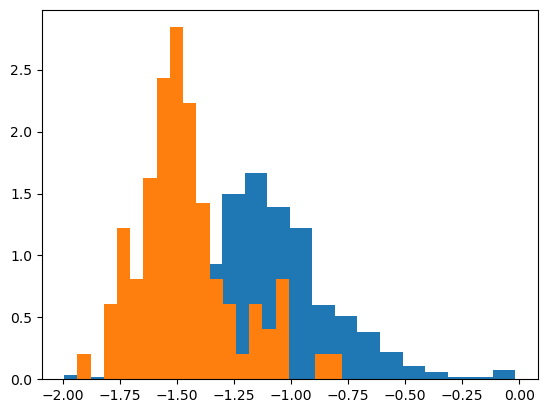

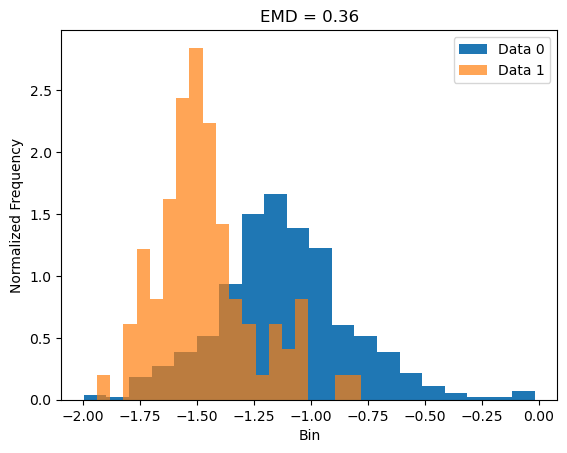

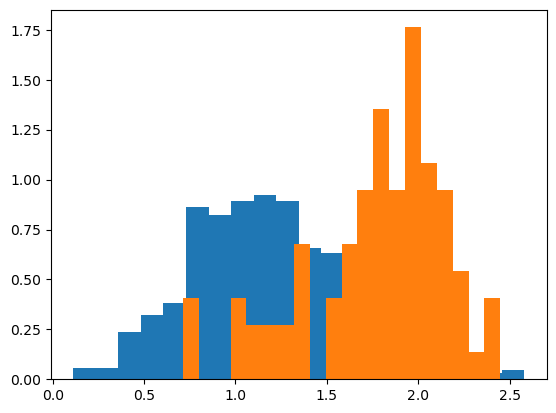

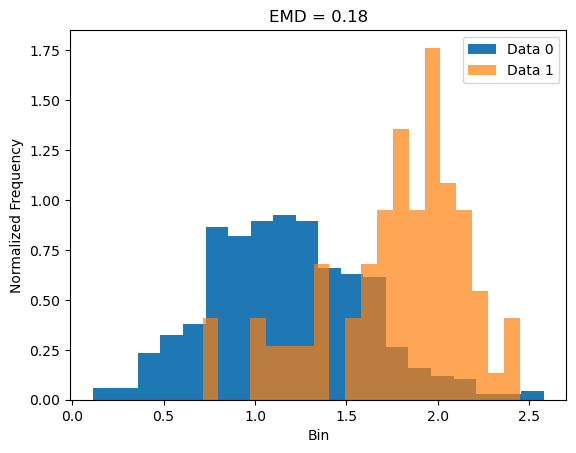

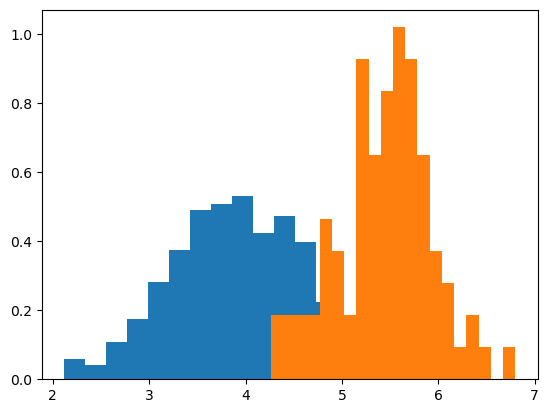

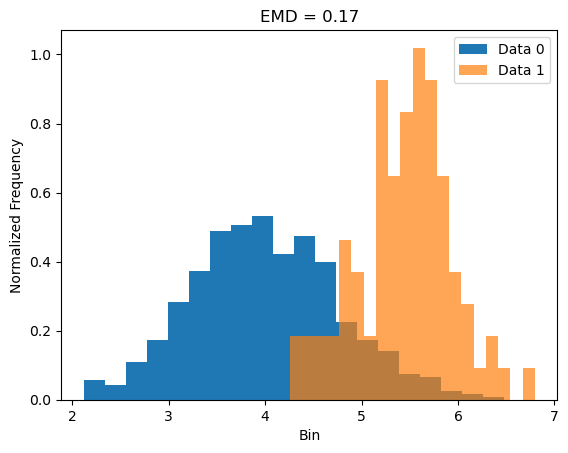

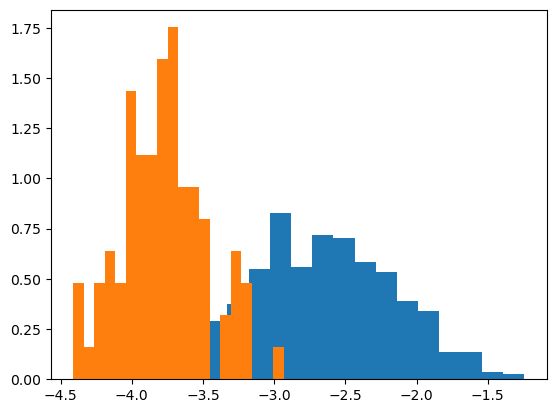

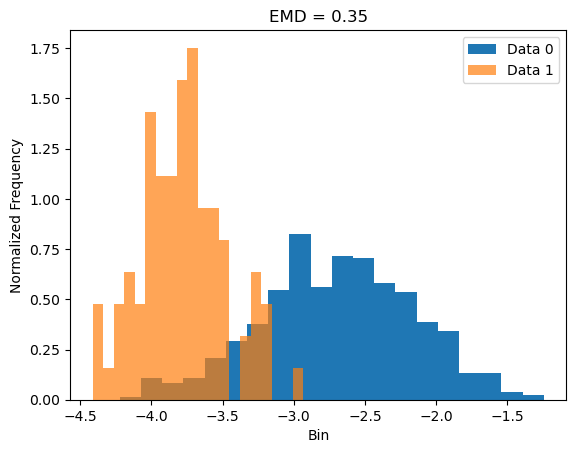

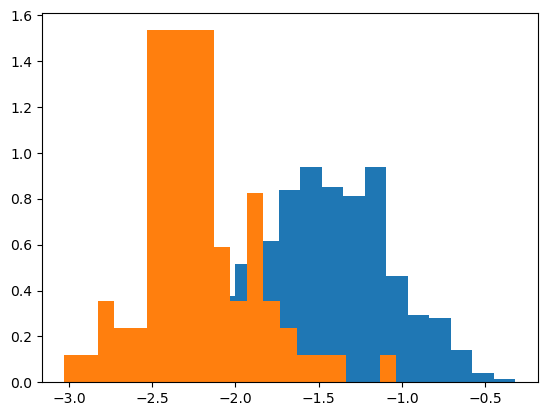

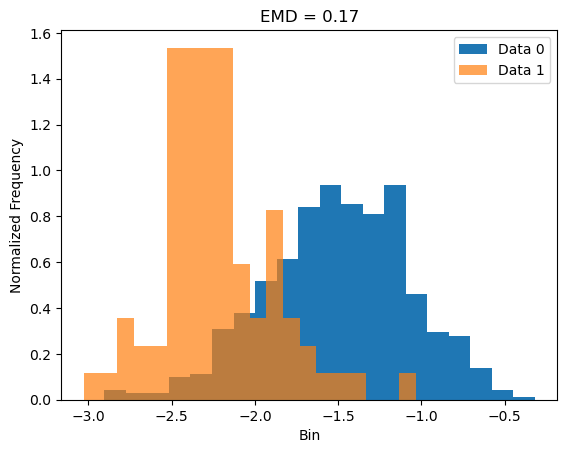

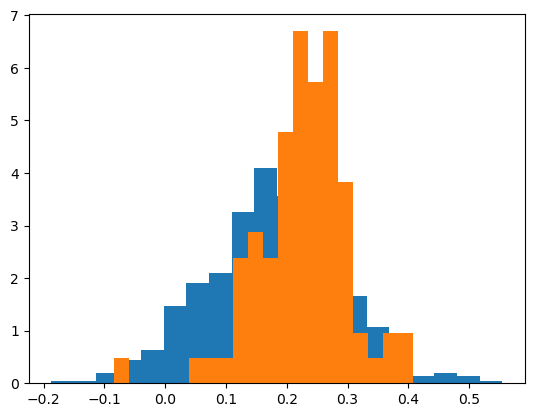

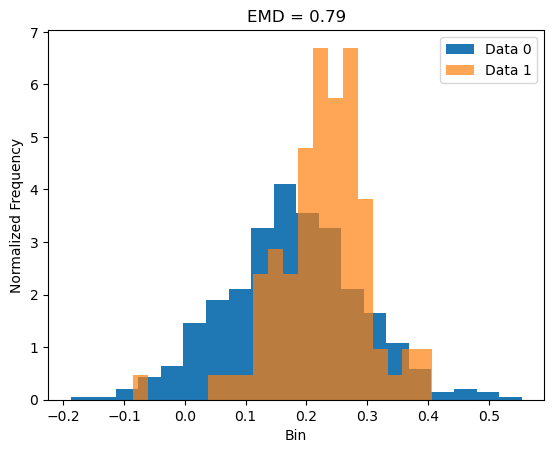

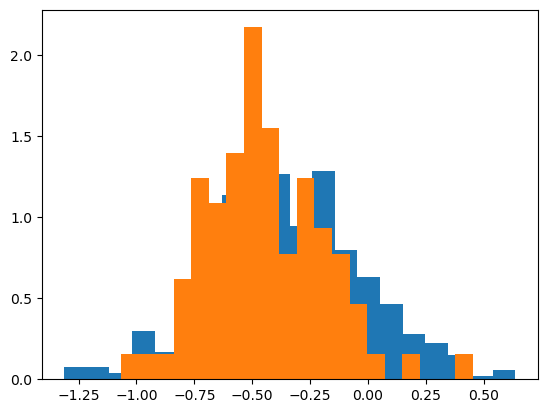

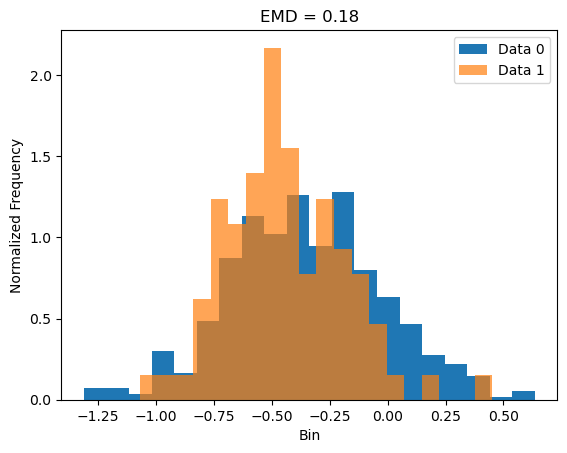

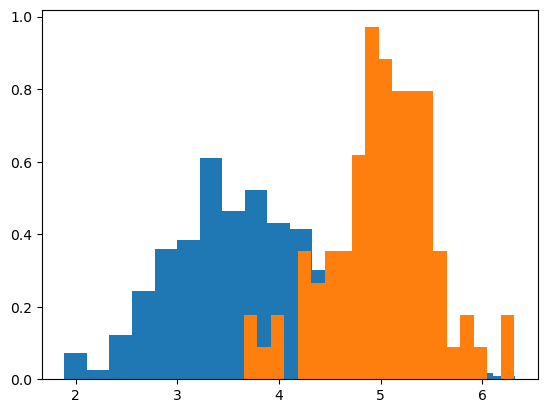

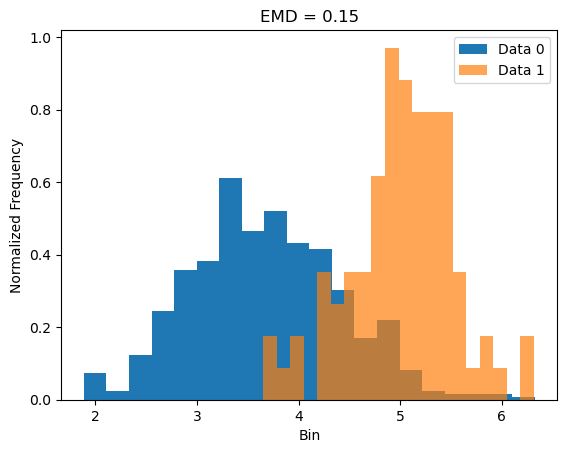

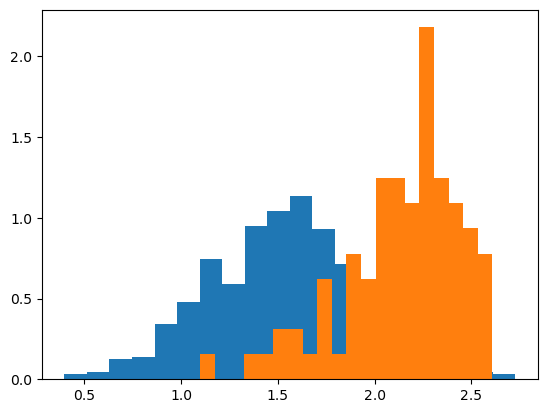

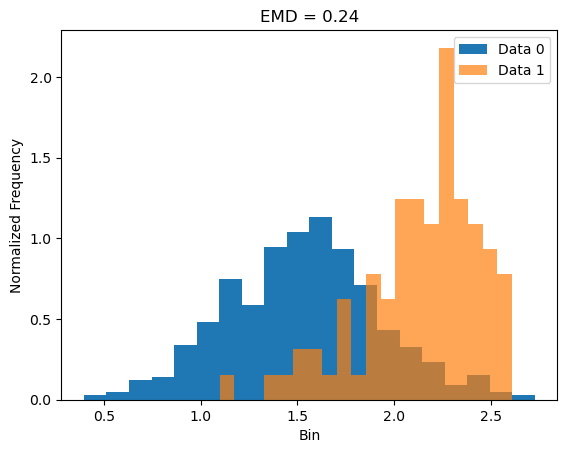

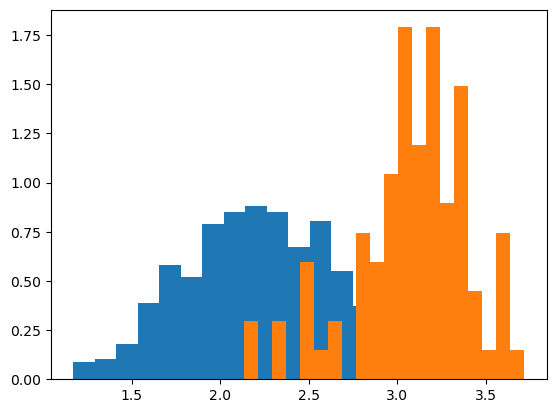

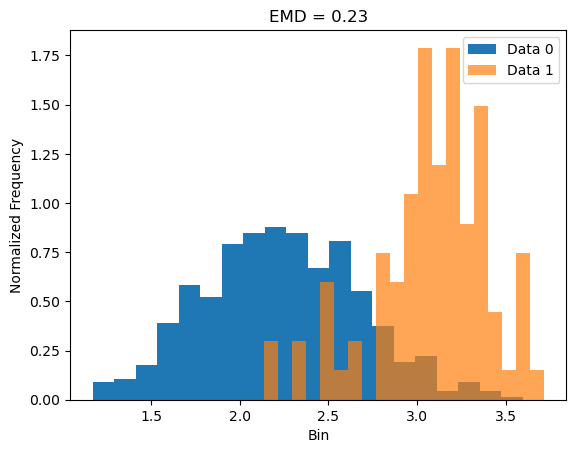

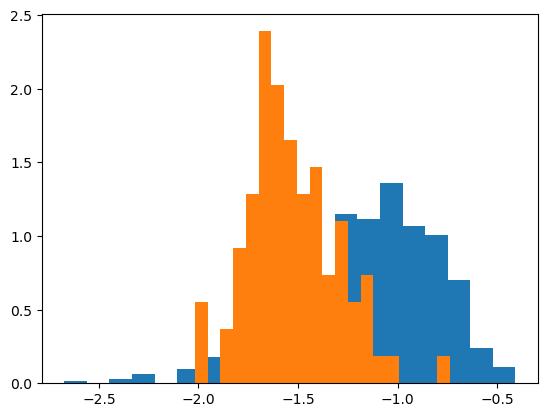

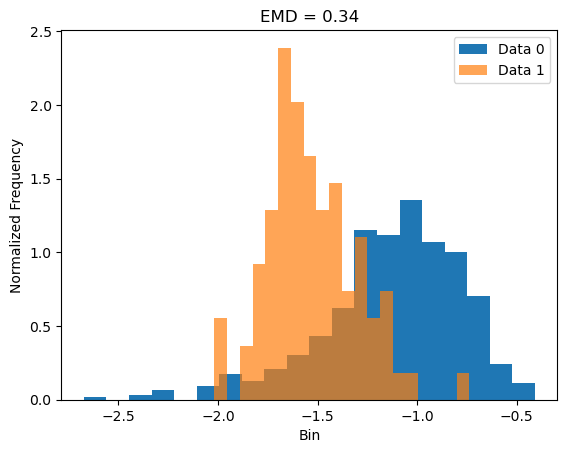

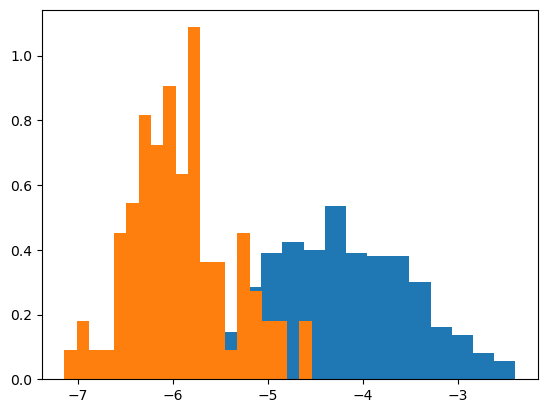

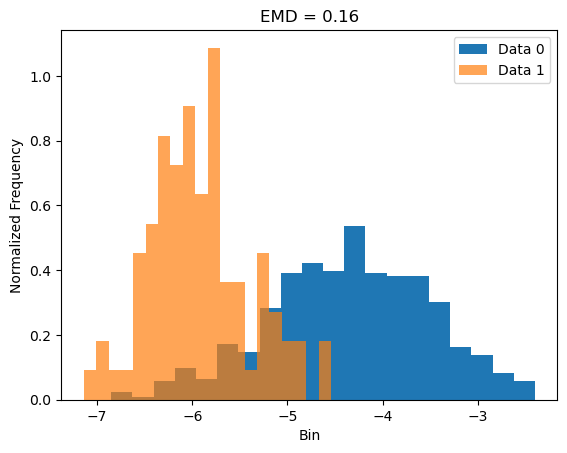

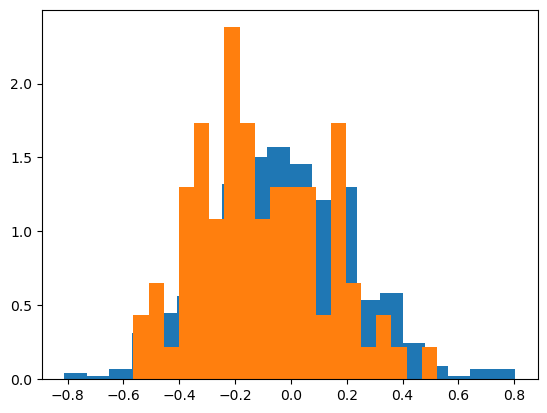

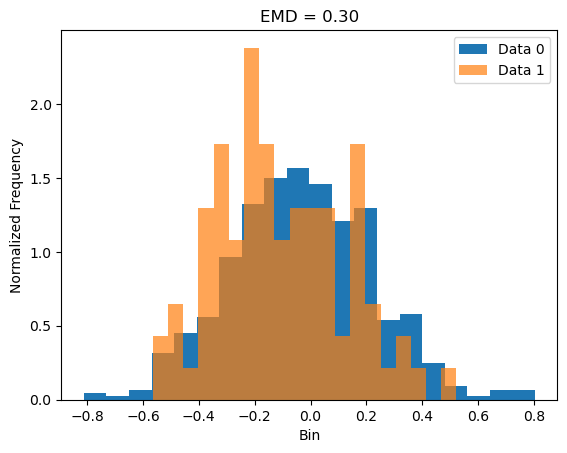

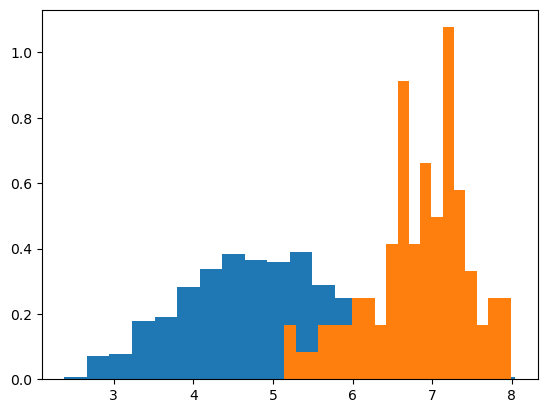

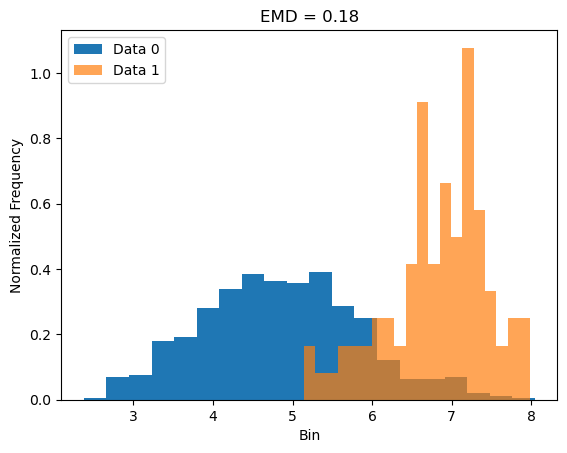

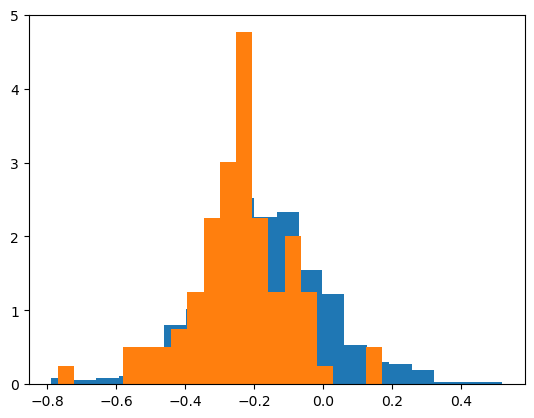

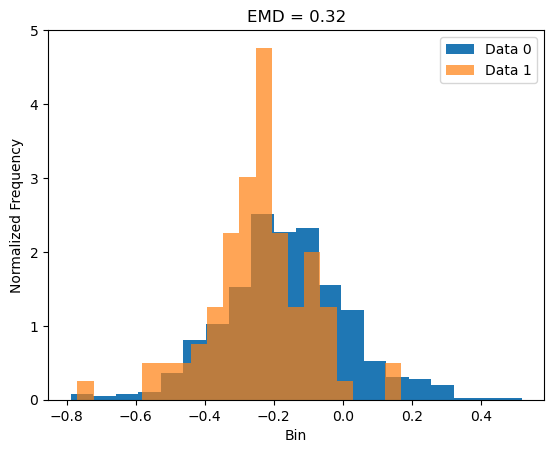

In [103]:
from scipy.stats import wasserstein_distance
for  col in integrated_space_0.columns:
    #Create histograms for each dataset
    his1, bins1, _ = plt.hist(integrated_space_0[col], bins=20, density=True)
    his2, bins2, _ = plt.hist(integrated_space_1[col], bins=20, density=True)
    
    # Compute the EMD distance between the normalized histograms
    emd = wasserstein_distance(his1, his2)
    
    # Plot the normalized histograms and the EMD distance
    fig, ax = plt.subplots()
    ax.hist(integrated_space_0[col], bins=bins1, density=True, label='Data 0')
    ax.hist(integrated_space_1[col], bins=bins2, density=True, label='Data 1', alpha=0.7)
    ax.legend()
    ax.set_xlabel('Bin')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'EMD = {emd:.2f}')
    plt.show()

In [104]:
imp_feature = integrated_space[5]
imp_feature = imp_feature.values

In [108]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr


# Calculate Pearson correlation coefficients and p-values
corr_coef, p_val = [], []
for col in gene.columns:
    r, p = pearsonr(imp_feature, gene[col])
    corr_coef.append(r)
    p_val.append(p)

# Filter the dataframe to keep only columns with correlation > 0.9
threshold = 0.35
corr_df = pd.DataFrame({'corr_coef': corr_coef, 'p_val': p_val}, index=gene.columns)
high_corr_cols = corr_df[corr_df['corr_coef'].abs() > threshold].index
filtered_df = gene[high_corr_cols]

In [112]:
corr_coef, p_val = [], []
for col in gene.columns:
    r, p = pearsonr(imp_feature, gene[col])
    corr_coef.append(r)
    p_val.append(p)

corr_df = pd.DataFrame({'corr_coef': corr_coef, 'p_val': p_val}, index=gene.columns)
corr_df_sorted = corr_df.sort_values(by='corr_coef', ascending=False)

top_genes = corr_df_sorted.index[:20]

filtered_df = gene[top_genes]

In [113]:
filtered_df

,DSC3,KRT14,TRIM29,FAT2,SFRP1,DSG3,SERPINB5,SOX10,GABRP,KRT5,SOSTDC1,STAC2,KRT17,ANXA8,MIA,OSR1,IRX1,KLK10,TP63,COL17A1
participant_id,,,,,,,,,,,,,,,,,,,,
aalk,7.966248,11.998546,9.638176,7.867899,10.129920,6.687714,7.572853,7.277807,9.146433,11.506802,5.802576,8.949735,12.195244,8.753038,7.179458,7.376155,7.179458,6.491017,8.654689,10.621664
aaak,8.145487,11.423549,9.536180,8.145487,10.529532,7.549476,6.953464,7.946817,9.138839,11.324214,4.966760,9.436845,11.423549,7.251470,6.953464,6.953464,8.840833,12.416901,8.344157,9.734850
aat1,6.570521,10.885491,9.022208,6.668589,9.316411,6.472454,5.785982,6.766656,8.629939,10.787423,2.942024,8.433804,10.002883,6.080184,5.982116,6.374386,6.962791,5.884049,7.355061,9.218343
a9qa,1.157519,1.473205,4.524845,7.099161,3.788242,0.105229,2.315037,1.473205,0.631374,1.473205,2.315037,1.157519,2.735953,-0.947061,3.577785,6.734653,-0.947061,1.683663,2.315037,5.471906
a0sf,8.713111,12.376579,10.396326,8.317061,11.683490,8.317061,7.921010,8.218048,7.425947,12.475591,5.247669,10.396326,11.584478,7.326935,7.227922,8.713111,7.821998,9.406200,9.703238,10.990402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a86g,10.361995,13.881164,11.437297,8.504657,13.685654,9.579958,9.188939,10.850769,11.339542,12.512598,7.527110,12.121579,13.099126,7.624864,9.677713,7.918129,10.068731,9.775467,9.873222,11.730561
ab41,2.703297,9.912091,6.808305,3.704519,6.908427,3.103786,6.708183,4.405374,6.007328,9.511602,1.201466,6.107450,9.811969,3.804641,5.807083,6.107450,4.105007,6.507938,5.106229,6.808305
a899,6.300002,9.886157,8.529233,6.300002,10.467695,5.815386,5.815386,6.590771,8.432310,10.080003,3.489232,8.044618,11.243080,5.233848,3.586155,7.366156,6.687694,5.136925,7.269233,9.304618
